In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats
from scipy import stats
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.stattools import omni_normtest

from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.api import qqplot, add_constant

from sklearn.preprocessing import scale, minmax_scale, robust_scale

# %matplotlib inline
# plt.set(font="AppleGothic")
# plt.rcParams['axes.unicode_minus']=False

%matplotlib inline
matplotlib.rc('font', family='AppleGothic')
plt.rc('font',  family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False

In [4]:
df_chaju = pd.read_csv('CreDB_chaju.csv', engine='python', encoding='cp949')
df_card = pd.read_csv('CreDB_card.csv', engine='python', encoding='cp949')
df_overdue = pd.read_csv('CreDB_overdue.csv', engine='python', encoding='cp949')
df_loan = pd.read_csv('CreDB_loan.csv', engine='python', encoding='cp949')



# 차주 ID 개수

In [6]:
len(df_chaju['chaju_id'])

1984

# 나이

In [7]:
min(df_chaju['age'])

21

In [8]:
max(df_chaju['age'])

85

# 성별

In [10]:
df_chaju['gender'].value_counts()

남성    1090
여성     894
Name: gender, dtype: int64

In [17]:
1090/894

1.2192393736017897

# 교육수준

In [11]:
df_chaju['edu'].value_counts()

대학교 졸업     719
고등학교 졸업    707
전문대학 졸업    223
중학교 졸업     146
대학교 재학      84
대학원 졸업      73
대학원 재학      16
초등학교 졸업     13
전문대학 재학      2
고등학교 재학      1
Name: edu, dtype: int64

# 주거형태

In [12]:
df_chaju['dwell_type'].value_counts()

자가       1550
전세        338
월세         85
사택/기타       8
영구임대        3
Name: dwell_type, dtype: int64

# 결혼

In [13]:

df_chaju['marriage'].value_counts()

기혼              1442
미혼               442
기타(이혼/별거/사별)     100
Name: marriage, dtype: int64

# 가족평균수입


In [14]:
df_chaju['income_home_grp'].value_counts()

500-599만원    404
300-399만원    393
400-499만원    355
600-699만원    247
200-299만원    232
700-799만원    119
100-199만원     83
800-899만원     56
99만원 이하       54
1000만원 이상     23
900-999만원     18
Name: income_home_grp, dtype: int64

# 자녀수

In [15]:
df_chaju['no_child'].value_counts()

2    1053
0     523
1     317
3      91
Name: no_child, dtype: int64

# 숫자형 변수 히스토그램

(array([152., 198., 276., 276., 283., 289., 220., 156.,  71.,  63.]), array([21. , 27.4, 33.8, 40.2, 46.6, 53. , 59.4, 65.8, 72.2, 78.6, 85. ]), <BarContainer object of 10 artists>)


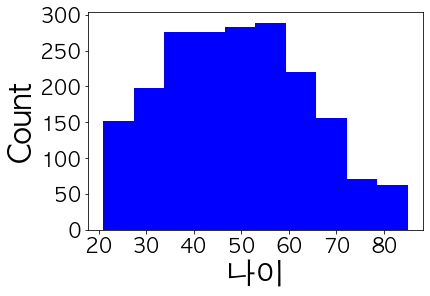

(array([ 523.,    0.,    0.,  317.,    0.,    0., 1053.,    0.,    0.,
         91.]), array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]), <BarContainer object of 10 artists>)


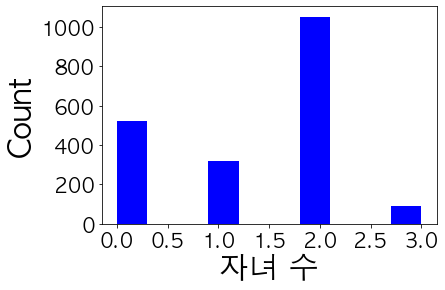

(array([ 24., 157., 443., 490., 448., 270.,  91.,  36.,  17.,   8.]), array([185. , 248.9, 312.8, 376.7, 440.6, 504.5, 568.4, 632.3, 696.2,
       760.1, 824. ]), <BarContainer object of 10 artists>)


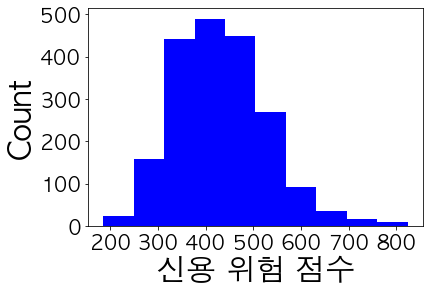

In [19]:
fs=30
labels=['age','no_child', 'score_risk']
labels_name=['나이','자녀 수', '신용 위험 점수']

for label, name in zip(labels, labels_name):
    _ = plt.hist(df_chaju[label], label=label,histtype='barstacked', linestyle='-',color='b')

    print(_)
    plt.ylabel('Count',fontsize=fs)
    plt.xlabel(name,fontsize=fs)
    plt.xticks(fontsize =fs-10)
    plt.yticks(fontsize =fs-10)

    plt.show()
    plt.close()

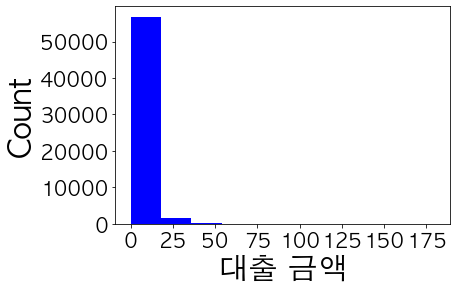

In [22]:
fs=30
labels=['loan_amt']
labels_name=['대출 금액']

for label, name in zip(labels, labels_name):
    plt.hist(df_loan[label]/1e7, label=label,histtype='barstacked', linestyle='-',color='b')
#     plt.legend()
#     plt.title(label+' histogram', fontsize=fs)
    plt.ylabel('Count',fontsize=fs)
    plt.xlabel(name,fontsize=fs)
    plt.xticks(fontsize =fs-10)
    plt.yticks(fontsize =fs-10)

    plt.show()
    plt.close()

# 개인 평균 수입(월)

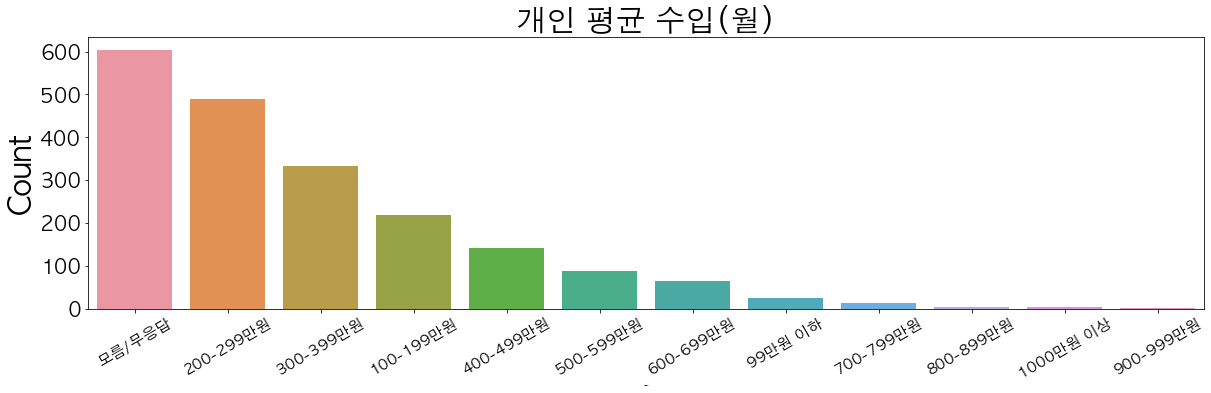

In [30]:
fs=30
plt.figure(figsize=(20,5))
sns.countplot(x=df_chaju['income_ind_grp'], order=df_chaju['income_ind_grp'].value_counts().index)
plt.title('개인 평균 수입(월)', fontsize=fs)
plt.ylabel('Count',fontsize=fs)
plt.xlabel(name,fontsize=0)
plt.xticks(fontsize =fs-15, rotation=30)
plt.yticks(fontsize =fs-10)
plt.show()
plt.close()

In [34]:
df['income_ind_grp_head'] = df['income_ind_grp'].apply(lambda x: int(x.split('-')[0])+50 if '-' in x else x.split('/')[0])
df['income_ind_grp_head'] = df['income_ind_grp'].apply(lambda x: int(x.split('-')[0])+50 if '-' in x else x.split('/')[0])
df['income_ind_grp_head'] = df['income_ind_grp'].apply(lambda x: int(x.split('-')[0])+50 if '-' in x else x.split('/')[0])
df['income_ind_grp_head'] = df['income_ind_grp_head'].apply(lambda x: 1050 if x=='1000만원 이상' else x)
df['income_ind_grp_head'] = df['income_ind_grp_head'].apply(lambda x: 50 if x=='99만원 이하' in x else x)
df['income_ind_grp_head'] = df['income_ind_grp_head'].apply(lambda x: 50 if x=='99만원 이하' in x else x)

In [51]:
pd.crosstab(df['gender'],df['income_ind_grp_head'], margins=True)

income_ind_grp_head,50,150,250,350,450,550,650,750,850,950,1050,모름,All
gender,,,,,,,,,,,,,
0,19,175,219,27,4,3,0,0,0,0,0,447,894
1,5,44,270,305,138,86,64,13,4,1,3,157,1090
All,24,219,489,332,142,89,64,13,4,1,3,604,1984


# 가족 평균 수입(월)


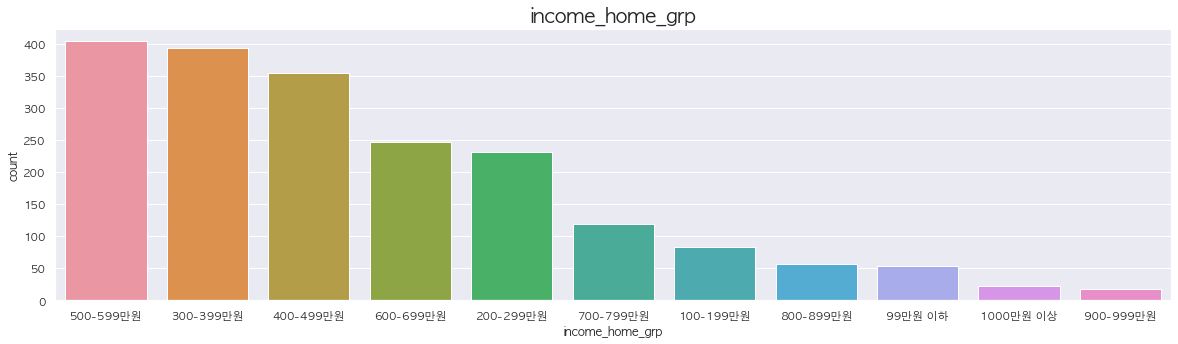

In [69]:
plt.figure(figsize=(20,5))
sns.countplot(x=df['income_home_grp'], order=df['income_home_grp'].value_counts().index)
plt.title('income_home_grp', fontsize=20)
plt.show()
plt.close()

In [36]:
df['income_home_grp_head'] = df['income_home_grp'].apply(lambda x: int(x.split('-')[0])+50 if '-' in x else x.split('/')[0])
df['income_home_grp_head'] = df['income_home_grp'].apply(lambda x: int(x.split('-')[0])+50 if '-' in x else x.split('/')[0])
df['income_home_grp_head'] = df['income_home_grp'].apply(lambda x: int(x.split('-')[0])+50 if '-' in x else x.split('/')[0])
df['income_home_grp_head'] = df['income_home_grp_head'].apply(lambda x: 1050 if x=='1000만원 이상' else x)
df['income_home_grp_head'] = df['income_home_grp_head'].apply(lambda x: 50 if x=='99만원 이하' in x else x)

In [37]:
pd.crosstab(df['gender'],df['income_home_grp_head'])

income_home_grp_head,50,150,250,350,450,550,650,750,850,950,1050
gender,,,,,,,,,,,
0,50,57,68,164,151,219,96,55,23,4,7
1,4,26,164,229,204,185,151,64,33,14,16


# 개인 평균 지출(월)

In [47]:

df['expenditure_grp_head'] = df['expenditure_grp'].apply(lambda x: int(x.split('-')[0])+50 if '-' in x else x.split('/')[0])
df['expenditure_grp_head'] = df['expenditure_grp'].apply(lambda x: int(x.split('-')[0])+50 if '-' in x else x.split('/')[0])
df['expenditure_grp_head'] = df['expenditure_grp'].apply(lambda x: int(x.split('-')[0])+50 if '-' in x else x.split('/')[0])
df['expenditure_grp_head'] = df['expenditure_grp_head'].apply(lambda x: 1050 if x=='1000만원 이상' else x)
df['expenditure_grp_head'] = df['expenditure_grp_head'].apply(lambda x: 50 if x=='99만원 이하' in x else x)

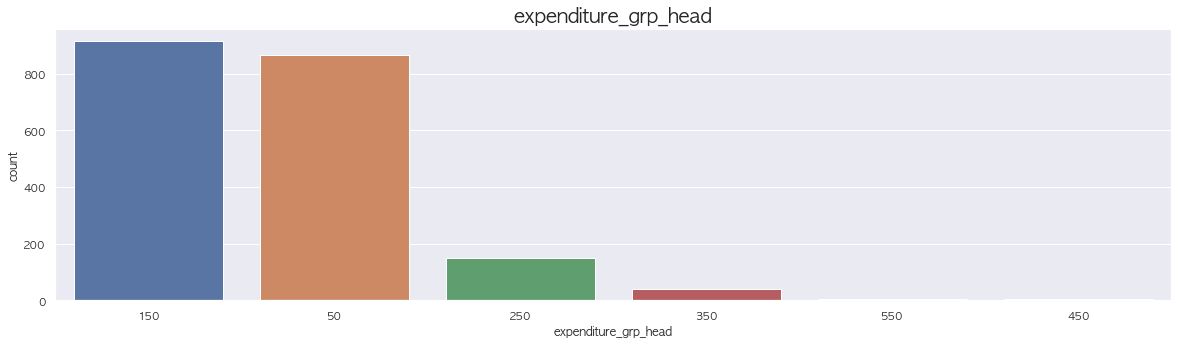

In [48]:
plt.figure(figsize=(20,5))
sns.countplot(x=df['expenditure_grp_head'], order=df['expenditure_grp_head'].value_counts().index)
plt.title('expenditure_grp_head', fontsize=20)
plt.show()
plt.close()

# 결혼

In [46]:
df.replace({'marriage': '미혼'}, 1, inplace=True)
df.replace({'marriage': '기혼'}, 0, inplace=True)
df.replace({'marriage': '기타(이혼/별거/사별)'}, -1, inplace=True)

# 분포 확인: 연속형 히스토그램

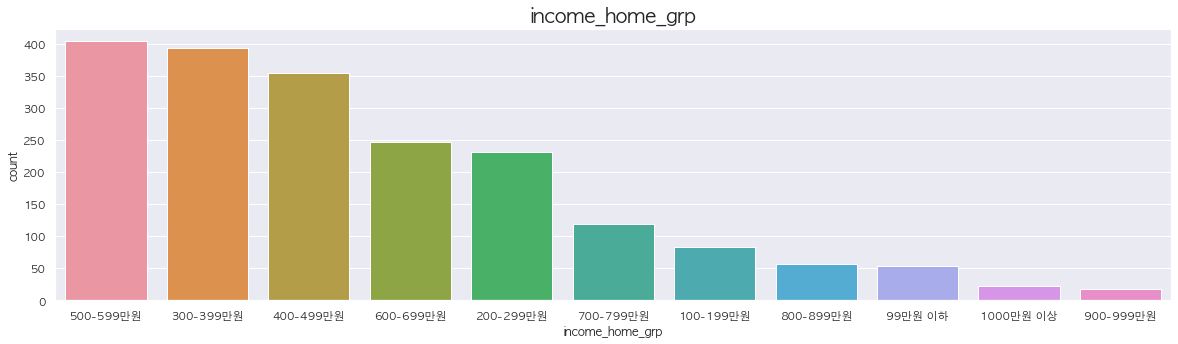

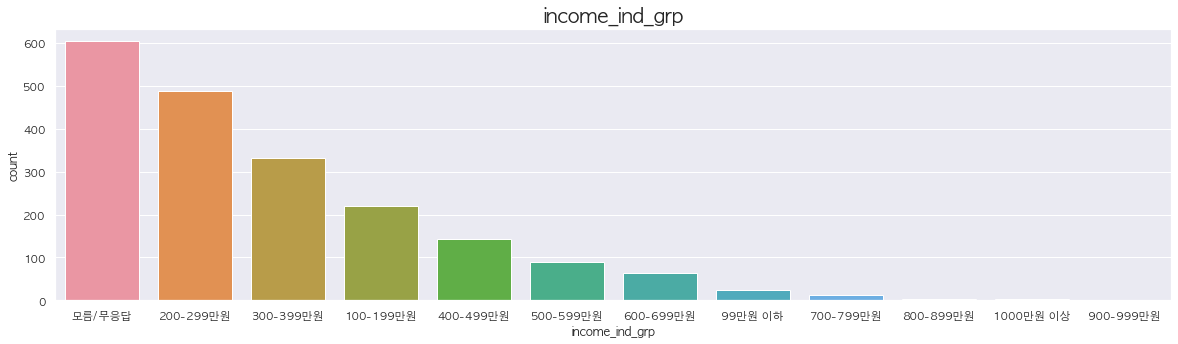

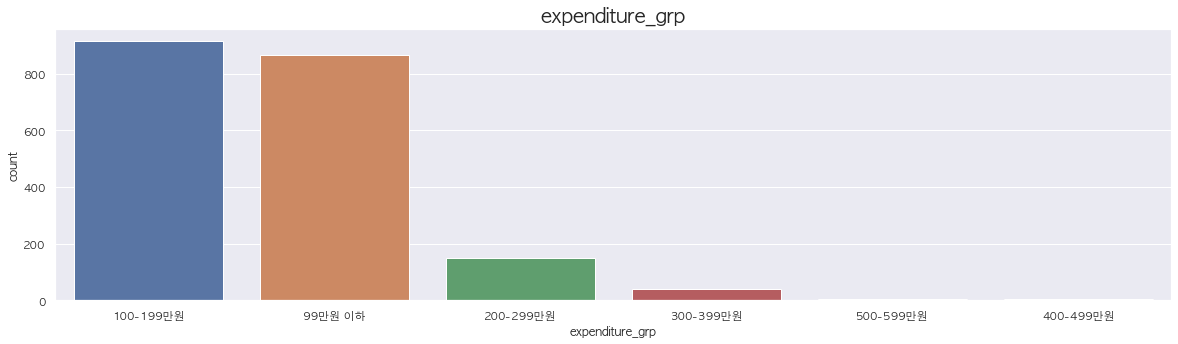

In [17]:
for i in ['income_home_grp', 'income_ind_grp', 'expenditure_grp']:
    plt.figure(figsize=(20,5))
    sns.countplot(x=df_char[i], order=df_char[i].value_counts().index)
    plt.title(i, fontsize=20)
    plt.show()
    plt.close()